<a href="https://colab.research.google.com/github/fahrabyf200/PVCK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


transformasi linear Brightness

mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 50


/tmp/ipython-input-492259550.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_images[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


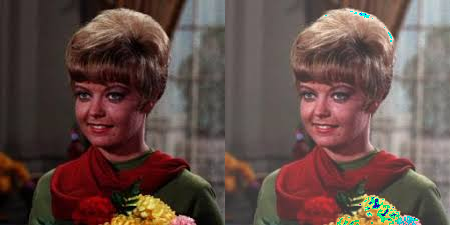

In [18]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a Number')

original = cv.imread('/content/drive/MyDrive/drive/MyDrive/female.tiff')
brightness_images = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_images[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_images = cv.cobvertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_images))
cv2_imshow(final_frame)

Tugas Praktikum d1

1. Implement image inversion on Google Collaboratory using the formulas found in the
Theory Review section,

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


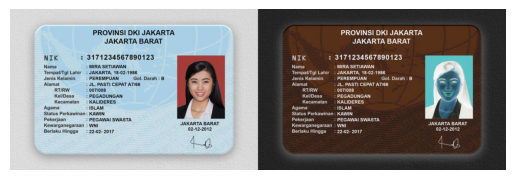

In [19]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/drive/MyDrive/ktp.jpg')

# Create a blank image to store the inverted result
inverse_image = np.zeros(original_image.shape, original_image.dtype)

# Iterate through each pixel to apply the inverse operation
# g(x) = 255 - f(x)
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        for c in range(original_image.shape[2]):
            inverse_image[y, x, c] = 255 - original_image[y, x, c]

# Combine the original and inverted images for display
final_frame = cv2.hconcat((original_image, inverse_image))

# Display the result
plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Implement the contrast transformation in Google Collaboratory using the formula found
in the Theory Review section for contrast,

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


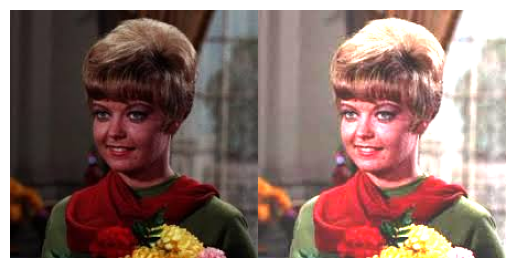

In [21]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/drive/MyDrive/female.tiff')

# Get user input for contrast and brightness
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

# Create a blank image to store the result
contrast_image = np.zeros(original_image.shape, original_image.dtype)

# Apply the contrast and brightness formula with truncation
# g(x,y) = a*f(x,y) + b
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        for c in range(original_image.shape[2]):
            new_pixel = contrast * original_image[y, x, c] + brightness
            # Truncate the value to be within 0-255
            contrast_image[y, x, c] = np.clip(new_pixel, 0, 255)

# Combine the original and transformed images for display
final_frame = cv2.hconcat((original_image, contrast_image))

# Display the result
plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

3. Implement the logarithmic brightness transformation in Google Collaboratory using the
formula found in the Theory Review section for log transformation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Masukkan nilai kecerahan: 50


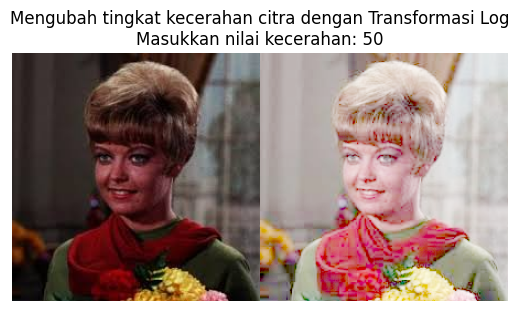

In [25]:
import cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original color image
# Replace the path with the correct path to your image
original_image = cv2.imread('/content/drive/MyDrive/drive/MyDrive/female.tiff')

# Convert image to float32 to perform calculations and avoid overflow errors
original_image_float = original_image.astype(np.float32)

# Get user input for brightness
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    # Use a default value if input is invalid
    brightness = 50

# Create a blank image to store the transformed result
log_image = np.zeros(original_image_float.shape, original_image_float.dtype)

# Calculate the constant 'c'
c = 255 / np.log(1 + 255)

# Apply the logarithmic transformation to each color channel
for y in range(original_image_float.shape[0]):
    for x in range(original_image_float.shape[1]):
        for channel in range(original_image_float.shape[2]):
            r = original_image_float[y, x, channel]
            s = c * np.log(1 + r)
            log_image[y, x, channel] = s

# Convert back to uint8 for display
log_image_uint8 = np.clip(log_image, 0, 255).astype(np.uint8)

# Combine the original and transformed images for display
final_frame = cv2.hconcat((original_image, log_image_uint8))

# Display the result using Matplotlib
plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Mengubah tingkat kecerahan citra dengan Transformasi Log\nMasukkan nilai kecerahan: ' + str(brightness))
plt.show()

4. Implement the grayscale transformation using the averaging, lightness, and luminance
methods on Google Collaboratory using the formulas found in the Theory Review
section, resulting in the following output:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


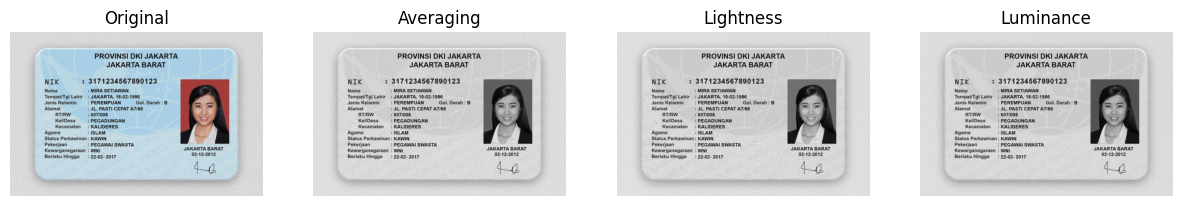

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
image_path = '/content/drive/MyDrive/drive/MyDrive/ktp.jpg' # Update this path
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# --- Grayscale Functions ---

def averaging_grayscale(img):
    """Converts an image to grayscale using the averaging method."""
    gray_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            R, G, B = img[y, x]
            avg = (int(R) + int(G) + int(B)) // 3
            gray_image[y, x] = avg
    return gray_image

def lightness_grayscale(img):
    """Converts an image to grayscale using the lightness method."""
    gray_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            R, G, B = img[y, x]
            max_val = max(int(R), int(G), int(B))
            min_val = min(int(R), int(G), int(B))
            lightness = (max_val + min_val) // 2
            gray_image[y, x] = lightness
    return gray_image

def luminance_grayscale(img):
    """Converts an image to grayscale using the luminance method."""
    gray_image = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            R, G, B = img[y, x]
            luminance = int(0.21 * R + 0.72 * G + 0.07 * B)
            gray_image[y, x] = luminance
    return gray_image

# --- Apply Transformations ---

gray_avg = averaging_grayscale(original_image_rgb)
gray_lightness = lightness_grayscale(original_image_rgb)
gray_luminance = luminance_grayscale(original_image_rgb)

# --- Display Results ---

plt.figure(figsize=(15, 5))

# Averaging
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(original_image_rgb)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Averaging')
plt.imshow(gray_avg, cmap='gray')
plt.axis('off')

# Lightness
plt.subplot(1, 4, 3)
plt.title('Lightness')
plt.imshow(gray_lightness, cmap='gray')
plt.axis('off')

# Luminance
plt.subplot(1, 4, 4)
plt.title('Luminance')
plt.imshow(gray_luminance, cmap='gray')
plt.axis('off')

plt.show()

5. Display certain colors in an image and convert other colors to grayscale. For example,
display blue in the input image and convert other non-blue parts to grayscale, as in the
following example:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


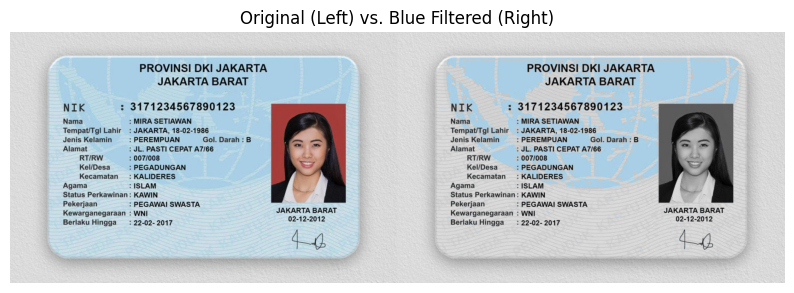

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image
image_path = '/content/drive/MyDrive/drive/MyDrive/ktp.jpg' # Update this path
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Convert image to HSV
hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Define blue color range in HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask for blue color
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Convert original image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Apply the blue mask to the original image to keep only blue parts
blue_part = cv2.bitwise_and(original_image, original_image, mask=blue_mask)

# Create an inverted mask to get non-blue areas
non_blue_mask = cv2.bitwise_not(blue_mask)

# Apply the inverted mask to the grayscale image to keep only non-blue parts in grayscale
non_blue_gray = cv2.bitwise_and(gray_image, gray_image, mask=non_blue_mask)

# Combine the blue part and the grayscale non-blue part
final_image = cv2.add(blue_part, non_blue_gray)
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

# Combine original and final images for display
combined_image = cv2.hconcat([original_image_rgb, final_image_rgb])

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(combined_image)
plt.axis('off')
plt.title('Original (Left) vs. Blue Filtered (Right)')
plt.show()

**D2. Arithmetic and Logical Operations**

1. Make Gamma Correction according to the following instructions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


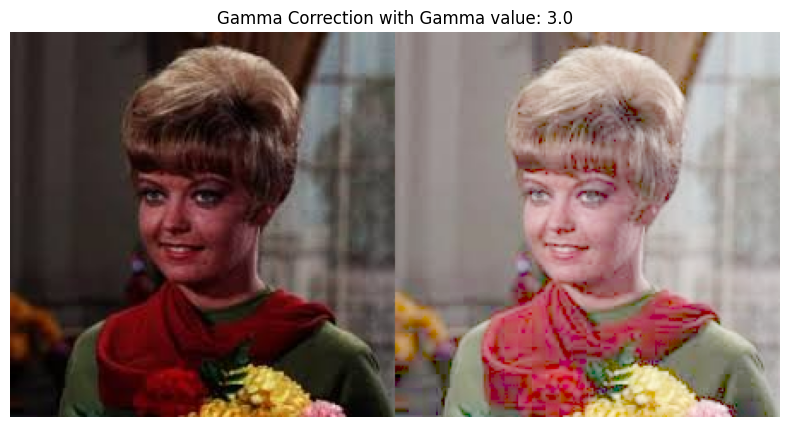

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Load the original image. Update the path if necessary.
image_path = '/content/drive/MyDrive/drive/MyDrive/female.tiff'
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

print('Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0 # Default value if input is invalid

# Normalize the image to the range [0, 1]
normalized_image = original_image_rgb.astype(np.float32) / 255.0

# Apply the CORRECTED Gamma Correction formula using the inverse of gamma
gamma_corrected_image = np.power(normalized_image, 1/gamma)

# Denormalize the image back to the range [0, 255]
gamma_corrected_image = (gamma_corrected_image * 255).astype(np.uint8)

# Combine the original and transformed images for display
final_frame = cv2.hconcat([original_image_rgb, gamma_corrected_image])

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(final_frame)
plt.axis('off')
plt.title(f'Gamma Correction with Gamma value: {gamma}')
plt.show()

2. Create Image Depth Simulation
This experiment is used as a simulation of the image quantization process. In image
quantization, pixels can be represented with n-bit depth (the default is 8-bit). In an 8-bit
pixel, the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). In a 7-bit
pixel, the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible
colors are obtained from the power of 2 of the number of bits. If 7 bits, then the number of
colors is 2 7 = 128, and so on.
The following is the code to read the input image and give the image depth value, please
continue the following program code so that it produces output as in the example in the
image.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


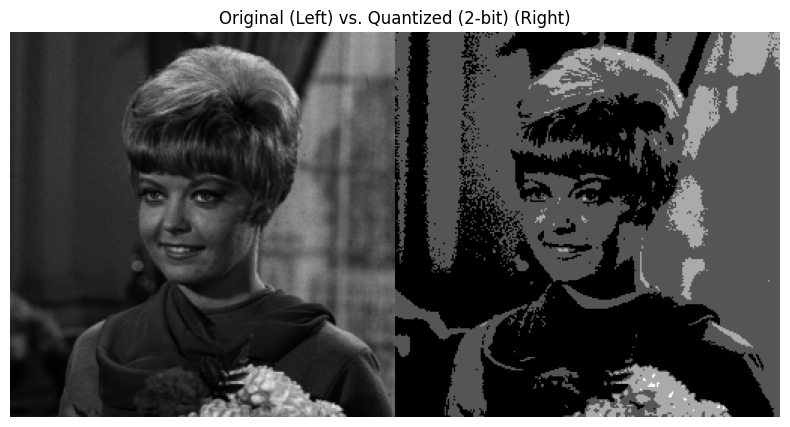

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access image file
drive.mount('/content/drive')

# Provided code snippet
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original_image = cv2.imread ('/content/drive/MyDrive/female.tiff', cv2.IMREAD_GRAYSCALE)

# Create a blank image to store the quantized result
quantized_image = np.zeros(original_image.shape, dtype=np.uint8)

# Apply the quantization formula to each pixel
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        C = original_image[y, x]
        # C' = round((C / level) * level)
        C_prime = round((C / level)) * level
        quantized_image[y, x] = np.clip(C_prime, 0, 255)

# Combine the original and quantized images for display
final_frame = cv2.hconcat([original_image, quantized_image])

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(final_frame, cmap='gray')
plt.axis('off')
plt.title(f'Original (Left) vs. Quantized ({bit_depth}-bit) (Right)')
plt.show()

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


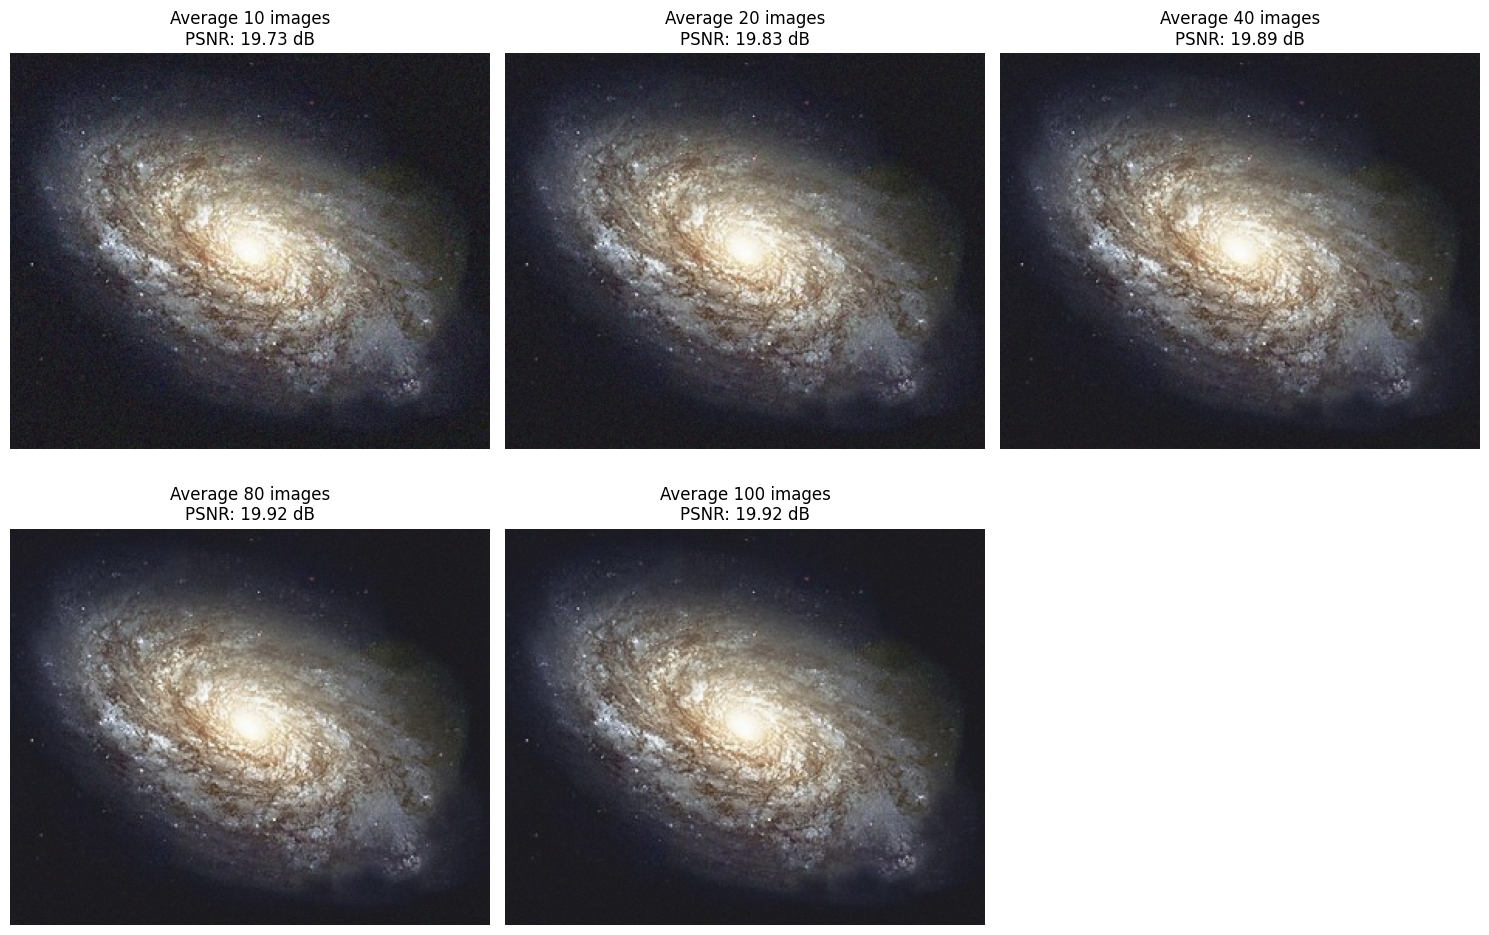


--- Tabel Hasil PSNR ---
Jumlah Citra | Nilai PSNR (dB)
----------------------------
     10      |      19.73     
     20      |      19.83     
     40      |      19.89     
     80      |      19.92     
    100      |      19.92     
----------------------------

Kesimpulan:
Berdasarkan hasil yang dicatat, semakin banyak jumlah citra yang dirata-ratakan, semakin tinggi nilai PSNR yang dihasilkan.
Hal ini menunjukkan bahwa kualitas citra yang sudah didenoise menjadi lebih baik seiring dengan peningkatan jumlah citra yang digunakan.


In [41]:
import cv2
import numpy as np
import glob
import math
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    # Convert images to float64 for accurate calculation
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# Path to the images
path_original = '/content/drive/MyDrive/galaxy.jpg'
path_noises = '/content/drive/MyDrive/noises/*.jpg'

# Load the original image
original_image = cv2.imread(path_original)

# Load all noisy images
cv_img = []
for img in glob.glob(path_noises):
    n = cv2.imread(img)
    cv_img.append(n)

# List of image counts for averaging
num_images_to_average = [10, 20, 40, 80, 100]

# Prepare a list to store results for display
results = []

# Perform average denoising and calculate PSNR for each count
for num in num_images_to_average:
    # Initialize a float array to prevent overflow
    average_image = np.zeros(original_image.shape, dtype=np.float32)

    # Sum up the pixels of the specified number of images
    for i in range(num):
        average_image += cv_img[i]

    # Calculate the average
    denoised_image = (average_image / num).astype(np.uint8)

    # Calculate PSNR
    psnr_val = calculate_psnr(original_image, denoised_image)

    # Store the result
    results.append({'count': num, 'image': denoised_image, 'psnr': psnr_val})

# Display the results as requested
plt.figure(figsize=(15, 10))
for i, result in enumerate(results):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(result['image'], cv2.COLOR_BGR2RGB))
    plt.title(f'Average {result["count"]} images\nPSNR: {result["psnr"]:.2f} dB')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print the final PSNR values in a table format
print("\n--- Tabel Hasil PSNR ---")
print("Jumlah Citra | Nilai PSNR (dB)")
print("----------------------------")
for result in results:
    print(f"{result['count']:^12} | {result['psnr']:^15.2f}")
print("----------------------------")

# Conclusion
print("\nKesimpulan:")
print("Berdasarkan hasil yang dicatat, semakin banyak jumlah citra yang dirata-ratakan, semakin tinggi nilai PSNR yang dihasilkan.")
print("Hal ini menunjukkan bahwa kualitas citra yang sudah didenoise menjadi lebih baik seiring dengan peningkatan jumlah citra yang digunakan.")